In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
file_path = r"C:\Users\chowd\Downloads\weather - weather.csv"
df = pd.read_csv(file_path)
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

In [35]:
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']

selected_data = df[selected_columns]

basic_stats = selected_data.describe()

mean_values = basic_stats.loc['mean']
median_values = selected_data.median()
std_dev_values = basic_stats.loc['std']

for column in selected_columns:
    print(f"\nStatistics for {column}:")
    print(f"Mean: {mean_values[column]}")
    print(f"Median: {median_values[column]}")
    print(f"Standard Deviation: {std_dev_values[column]}")



Statistics for MinTemp:
Mean: 7.265573770491804
Median: 7.45
Standard Deviation: 6.025799834253392

Statistics for MaxTemp:
Mean: 20.550273224043714
Median: 19.65
Standard Deviation: 6.690515669598577

Statistics for Rainfall:
Mean: 1.428415300546448
Median: 0.0
Standard Deviation: 4.225799585804068

Statistics for Evaporation:
Mean: 4.521857923497268
Median: 4.2
Standard Deviation: 2.6693825342212665


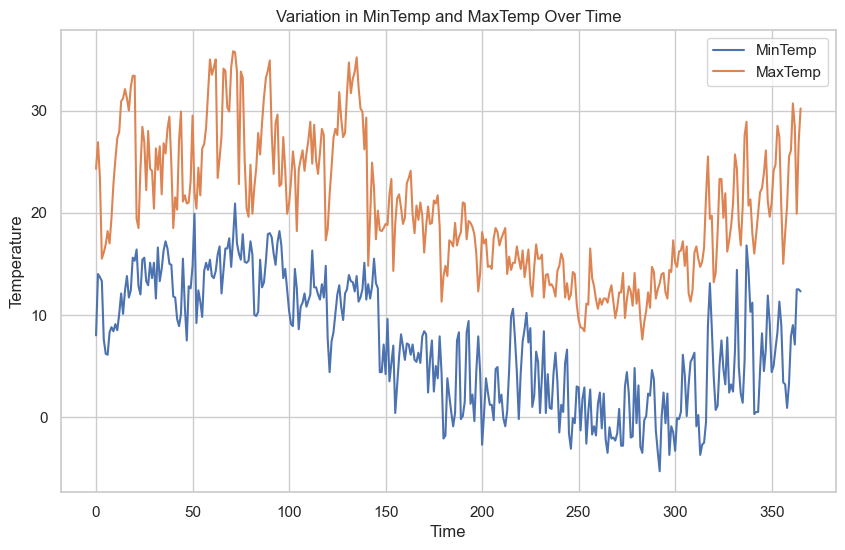

In [36]:
time_index = range(len(df))

plt.figure(figsize=(10, 6))
plt.plot(time_index, df['MinTemp'], label='MinTemp')
plt.plot(time_index, df['MaxTemp'], label='MaxTemp')
plt.title('Variation in MinTemp and MaxTemp Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


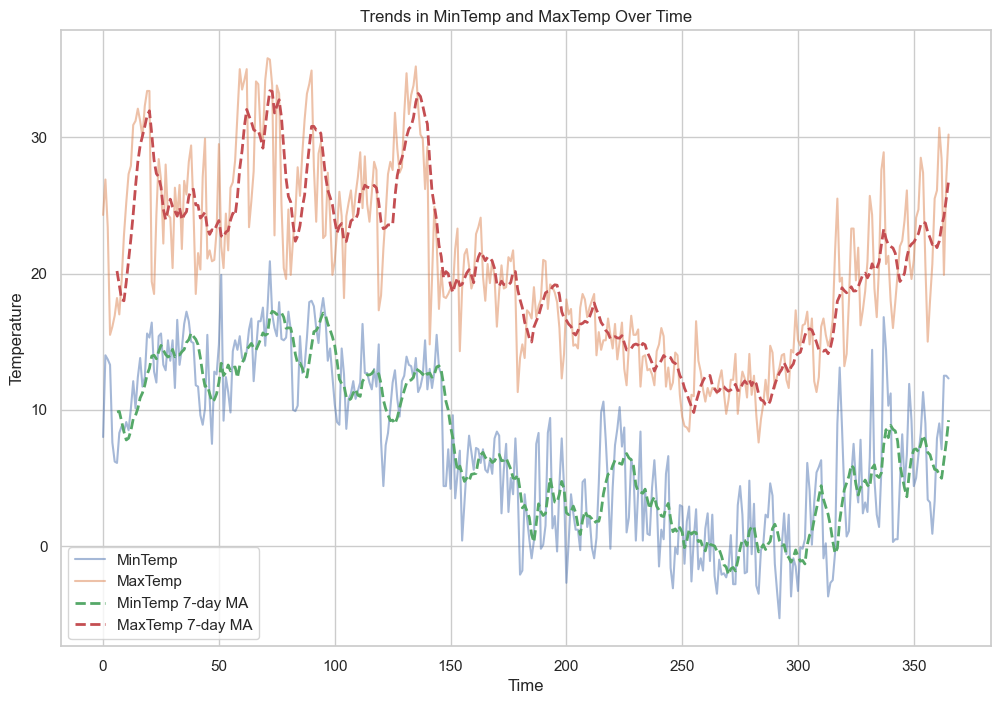

In [37]:
# Compute rolling averages for MinTemp and MaxTemp
window_size = 7  # You can adjust the window size based on your data
df['MinTemp_MA'] = df['MinTemp'].rolling(window=window_size).mean()
df['MaxTemp_MA'] = df['MaxTemp'].rolling(window=window_size).mean()

# Plot the original data and rolling averages
plt.figure(figsize=(12, 8))
plt.plot(df['MinTemp'], label='MinTemp', alpha=0.5)
plt.plot(df['MaxTemp'], label='MaxTemp', alpha=0.5)
plt.plot(df['MinTemp_MA'], label=f'MinTemp {window_size}-day MA', linestyle='--', linewidth=2)
plt.plot(df['MaxTemp_MA'], label=f'MaxTemp {window_size}-day MA', linestyle='--', linewidth=2)

plt.title('Trends in MinTemp and MaxTemp Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


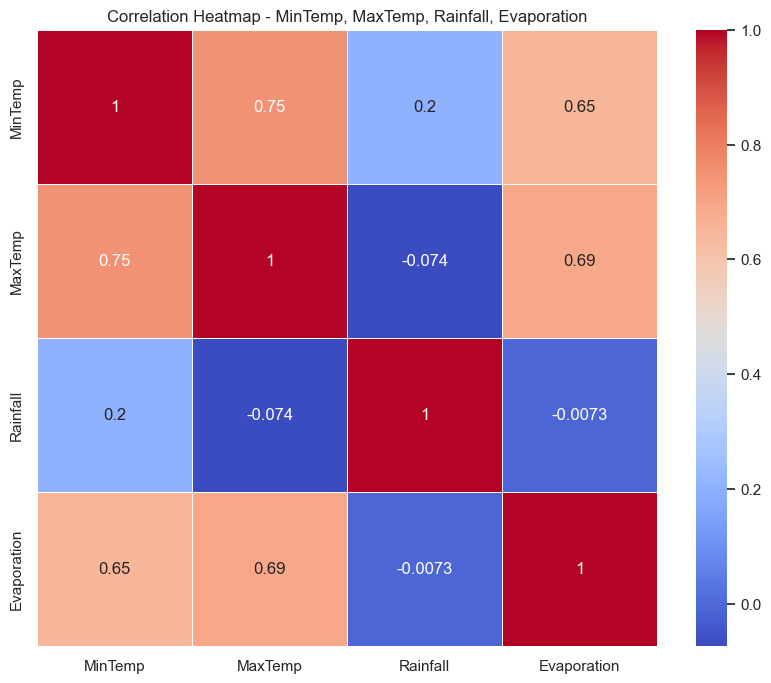

In [38]:
# Selecting columns for correlation analysis
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']

# Creating a subset DataFrame with selected columns
subset_df = df[selected_columns]

# Calculating correlation matrix
correlation_matrix = subset_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap - MinTemp, MaxTemp, Rainfall, Evaporation')
plt.show()


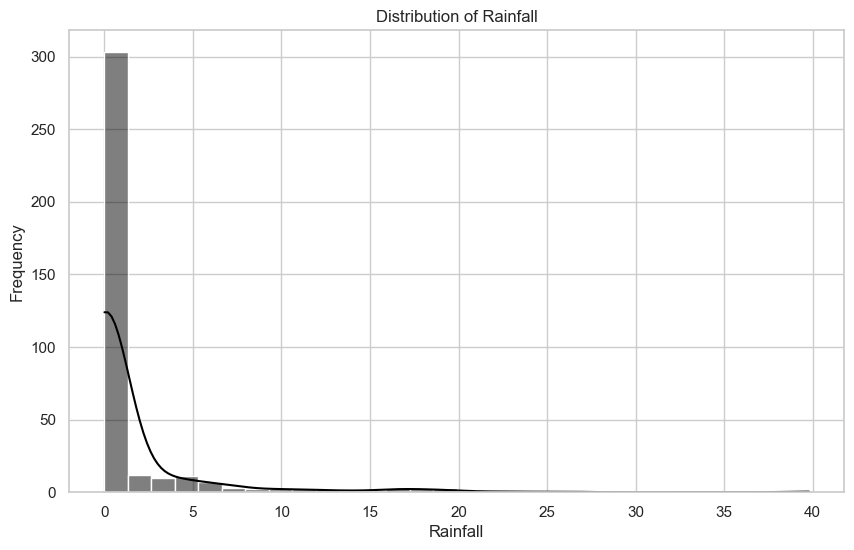

In [39]:
# Selecting the Rainfall column
rainfall_data = df['Rainfall']

# Creating a histogram
plt.figure(figsize=(10, 6))
sns.histplot(rainfall_data, kde=True, bins=30, color='black')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()


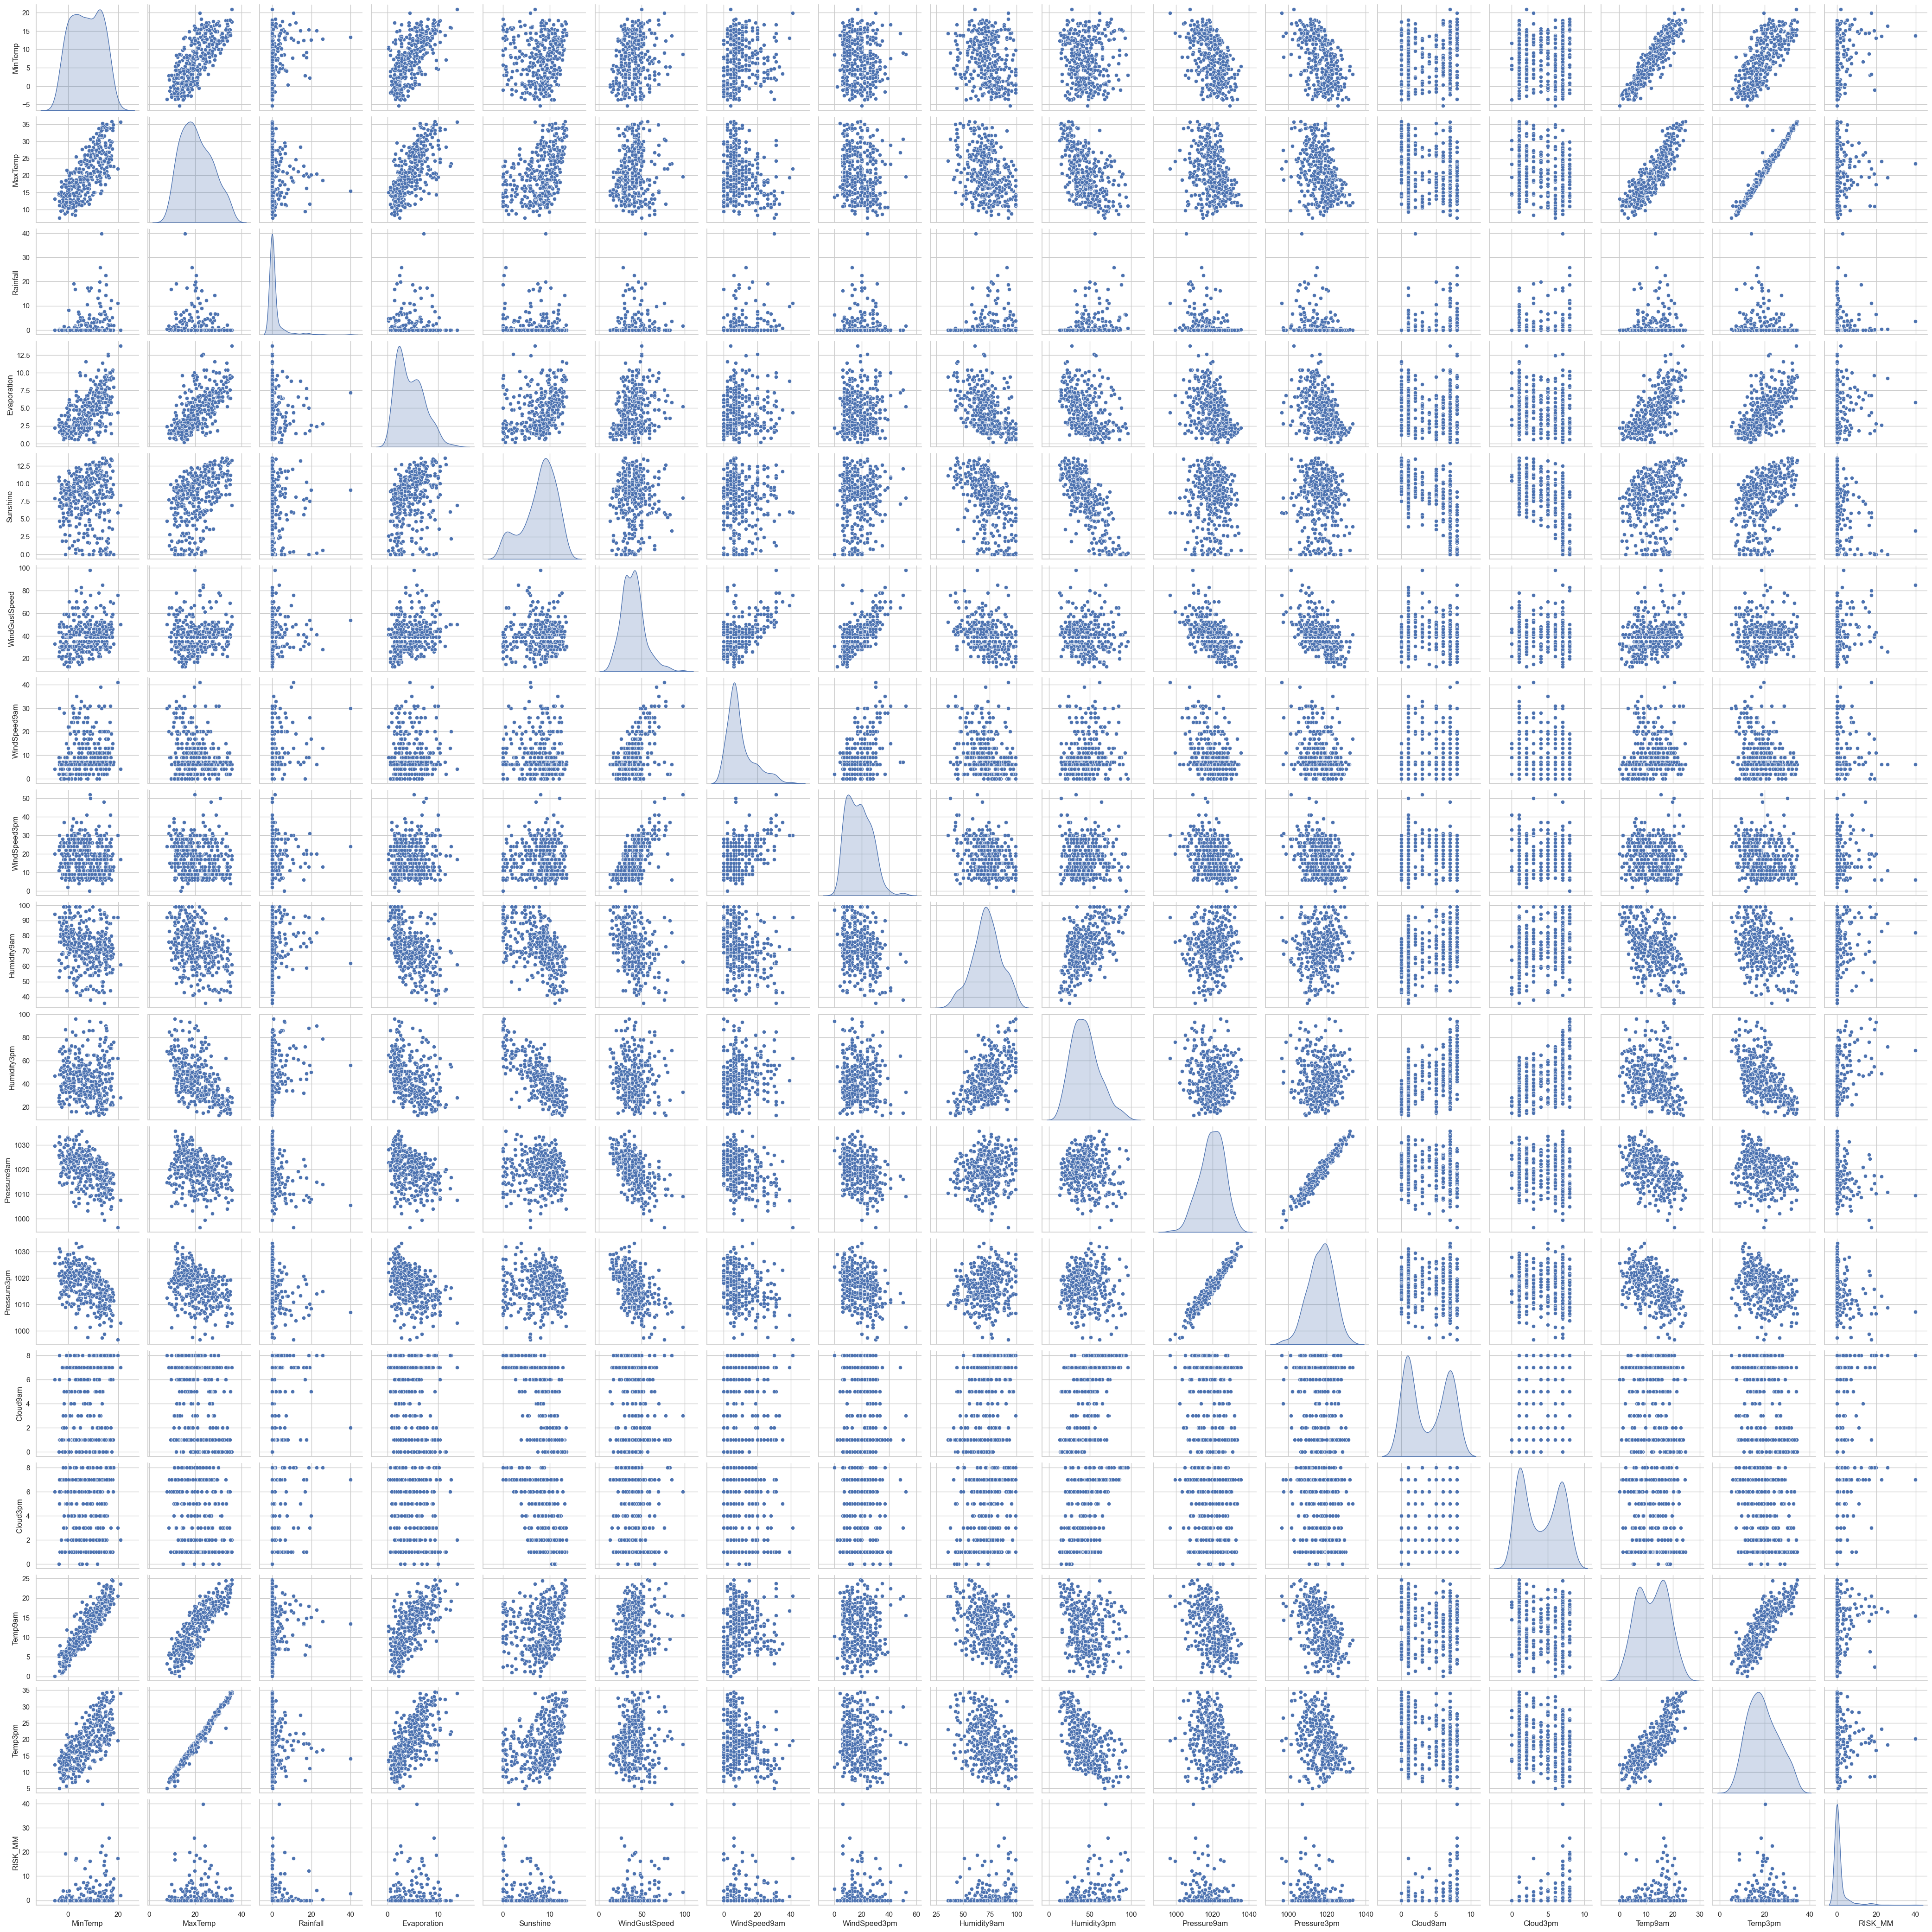

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']], diag_kind='kde')
plt.show()

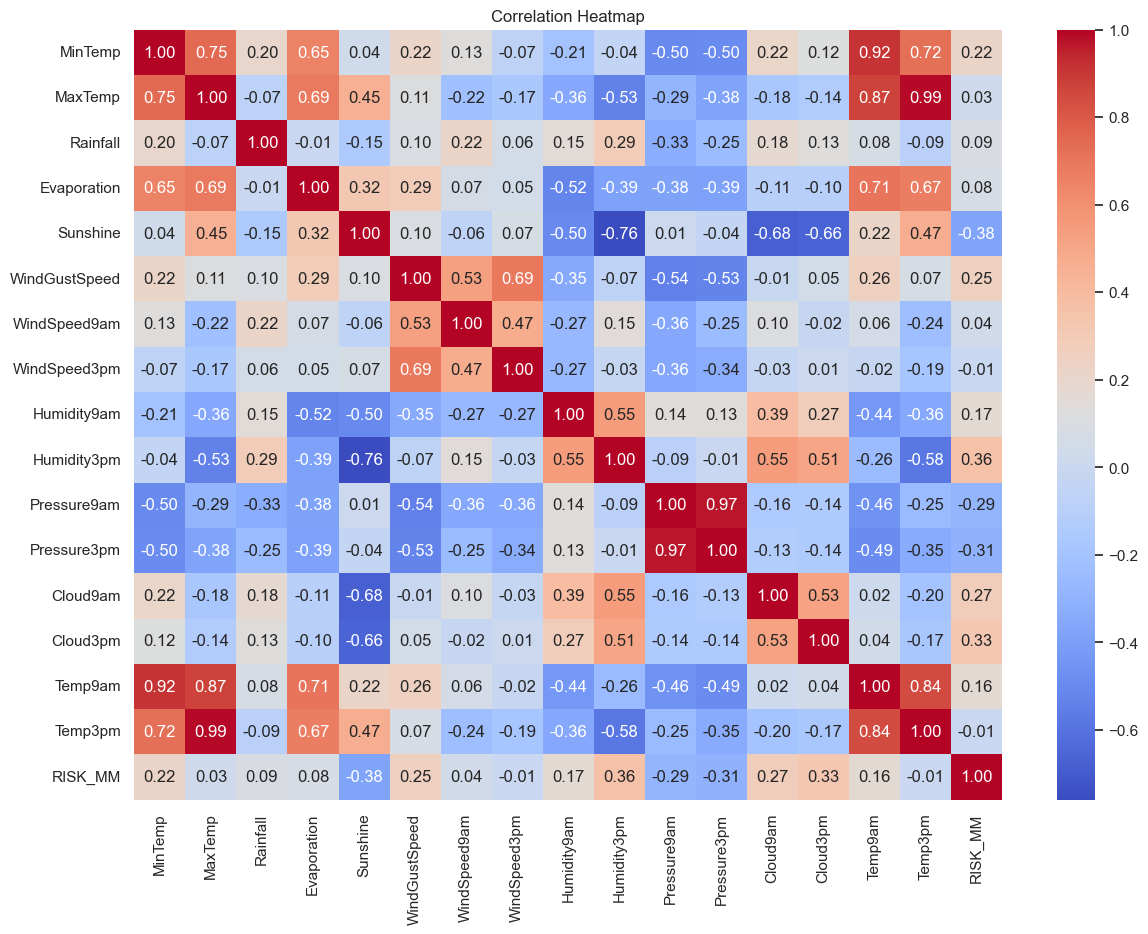

In [42]:
# Correlation heatmap for numerical variables
correlation_matrix = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



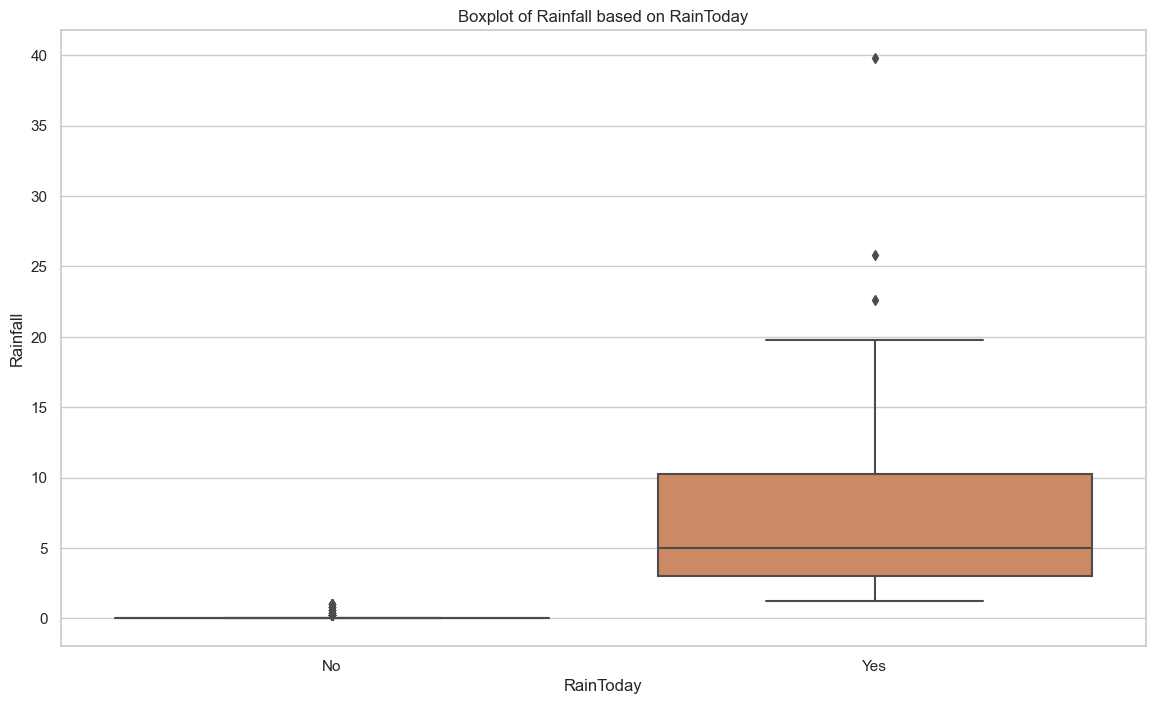

In [44]:
# Boxplot for categorical variables
plt.figure(figsize=(14, 8))
sns.boxplot(x='RainToday', y='Rainfall', data=df)
plt.title('Boxplot of Rainfall based on RainToday')
plt.show()

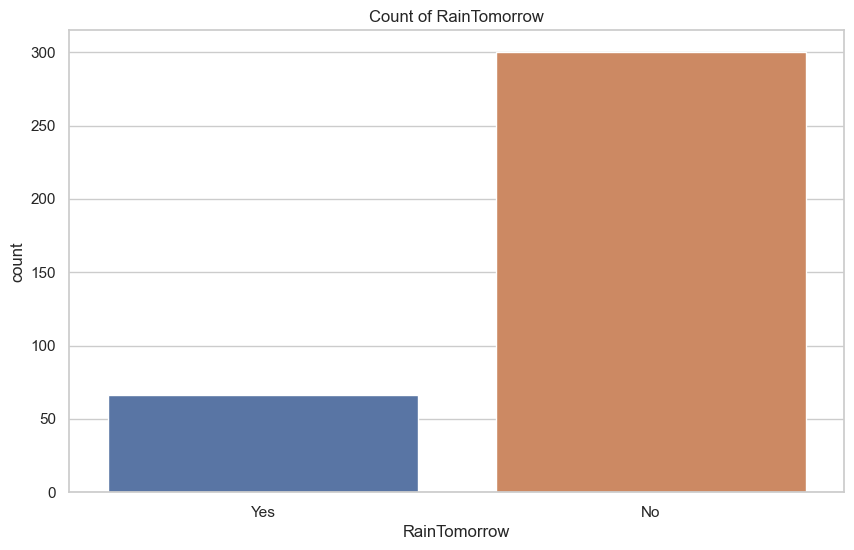

In [45]:
# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Count of RainTomorrow')
plt.show()

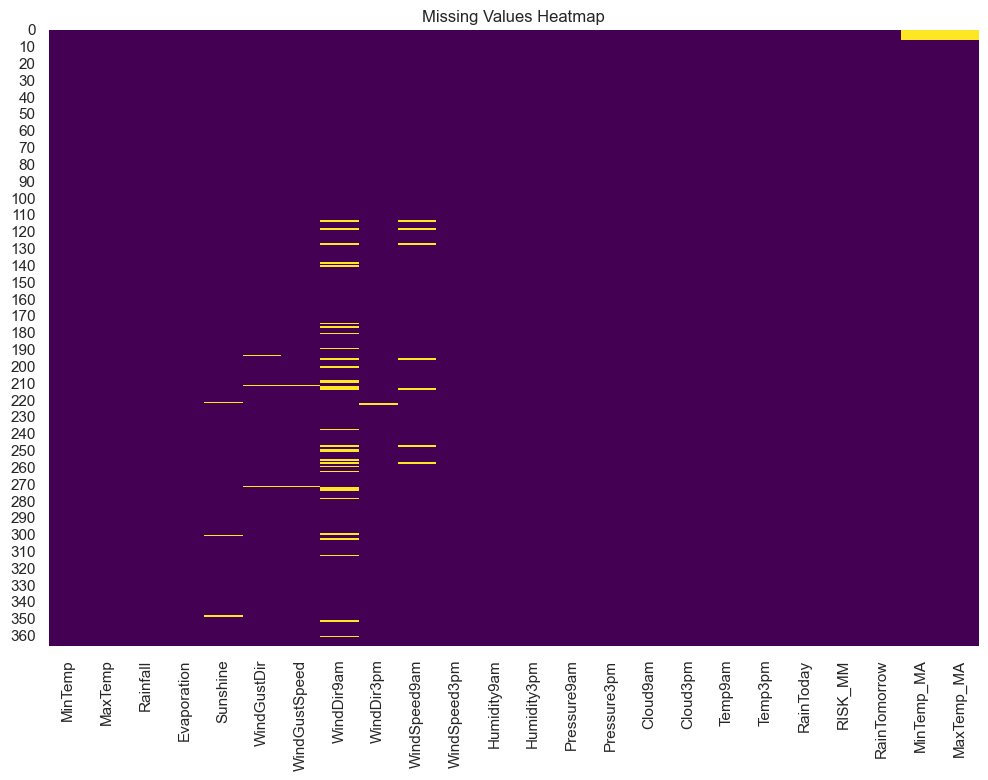

In [46]:
# Handle missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is in a CSV file named 'weather_data.csv'
df1 = pd.read_csv(r"C:\Users\chowd\Downloads\archive (1)\weatherAUS.csv")
df1

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [51]:
df1['Date'] = pd.to_datetime(df1['Date'])


In [52]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df1['Season'] = df1['Date'].dt.month.apply(get_season)


In [53]:
seasonal_avg = df1.groupby('Season').mean()

C:\Users\chowd\AppData\Local\Temp\ipykernel_59140\4283636683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal_avg = df1.groupby('Season').mean()


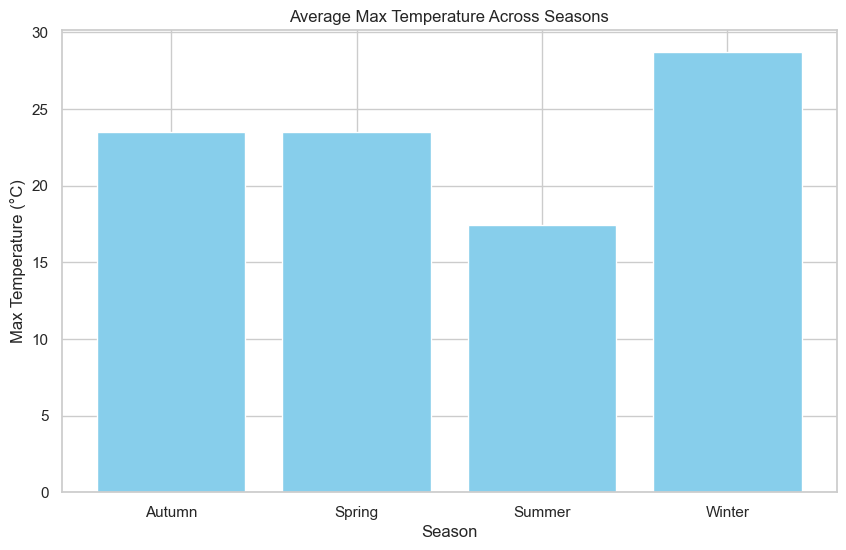

In [60]:
# Example for MaxTemp
plt.figure(figsize=(10, 6))
plt.bar(seasonal_avg.index, seasonal_avg['MaxTemp'], color='skyblue')
plt.title('Average Max Temperature Across Seasons')
plt.xlabel('Season')
plt.ylabel('Max Temperature (°C)')
plt.show()

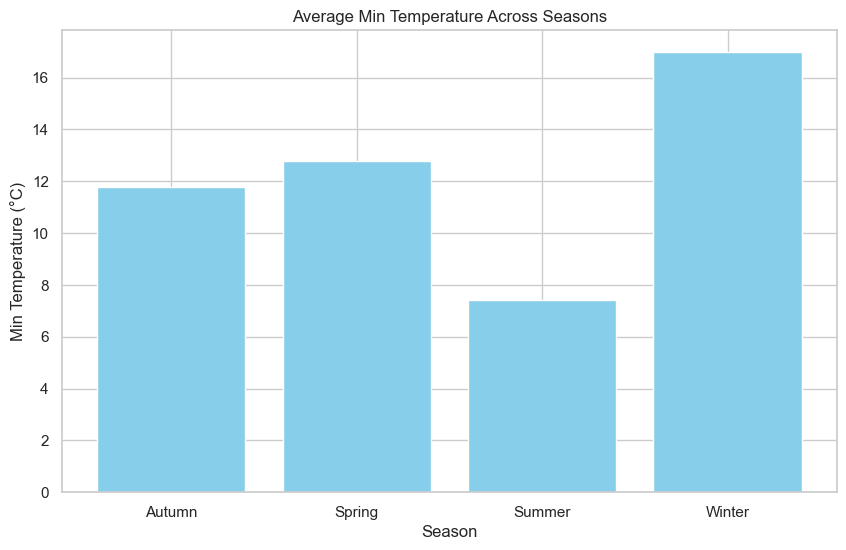

In [61]:
# Example for MaxTemp
plt.figure(figsize=(10, 6))
plt.bar(seasonal_avg.index, seasonal_avg['MinTemp'], color='skyblue')
plt.title('Average Min Temperature Across Seasons')
plt.xlabel('Season')
plt.ylabel('Min Temperature (°C)')
plt.show()